# Investigating Discrimination in Schools

Data obtained at Civil Rights Data Collection
<br>https://ocrdata.ed.gov/

Utilizing two types of datasets:
1. Individuals districts
2. Individual schools

Investigating:
- Counties and schools with highest amount of discrimination allegations
- Relationship between diversity ratio and discrimination allegations
- Relationship between teacher student ratio and discrimination allegations
- Ability to use machine learning to predict discrimination allegations

There seems to be some difference in numbers between the two datasets, so I will explore both. I will be utilizing the school based data more at the end when I start adding more data like teacher count.

Also, please note that this data is from 2015.

## Investigate District Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

In [2]:
df = pd.read_csv('GeorgiaBullying2015.csv')
df.head()

,Lea State,LEA,ID,Year,Category,Allegations,American Indian or Alaska Native,Asian,Hawaiian/ Pacific Islander,Hispanic,Black,White,Two or more races,Total,SWD (IDEA-Eligible),SWD (Section 504 only),LEP
0,GA,Chattahoochee County,1301050,2015,Allegations - basis of race color or national ...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GA,Chattahoochee County,1301050,2015,Allegations - basis of religion,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GA,Chattahoochee County,1301050,2015,Disciplined for harassment or bullying on basi...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GA,Chattahoochee County,1301050,2015,Students reported to have been harassed or bul...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GA,Chattahoochee County,1301050,2015,Total enrollment,NaN,4.0,9.0,4.0,105.0,267.0,462.0,39.0,890.0,135.0,4.0,10.0


In [3]:
# Race / Ethnicity / Nationality
ren = ['American Indian or Alaska Native','Asian', 'Hawaiian/ Pacific Islander', 'Hispanic', 'Black', 'White', 'Two or more races', 'Total']


Number of Counties with No Reported Allegations: 146
Number of Recorded Counties: 203


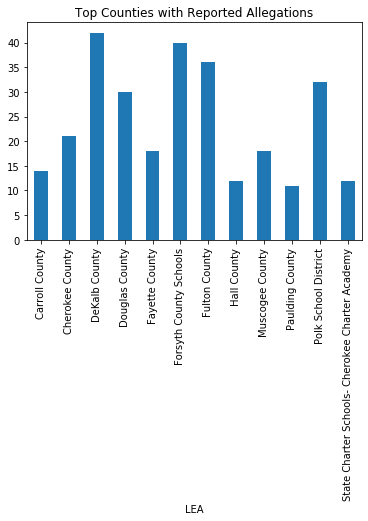

In [31]:
# Group by counties and sum the allegations for each one
df_allegation_sum = df.groupby('LEA')['Allegations'].sum()
df_allegation_sum[df_allegation_sum > 10].plot(kind="bar");
plt.title("Top Counties with Reported Allegations");

print("Number of Counties with No Reported Allegations: {}".format(len(df_allegation_sum[df_allegation_sum == 0].index)))
print("Number of Recorded Counties: {}".format(len(df.LEA.unique())))

In [5]:
allegation_top_counties = df_allegation_sum[df_allegation_sum > 10].sort_values(ascending=False)
for x,y in allegation_top_counties.iteritems():
    print(x,y)

DeKalb County 42.0
Forsyth County Schools 40.0
Fulton County 36.0
Polk School District 32.0
Douglas County 30.0
Cherokee County 21.0
Muscogee County 18.0
Fayette County 18.0
Carroll County 14.0
State Charter Schools- Cherokee Charter Academy 12.0
Hall County 12.0
Paulding County 11.0


**Now that we have the schools with the highest amount of race based allegations, let's visualize other features in the dataset and possibly find relationships**

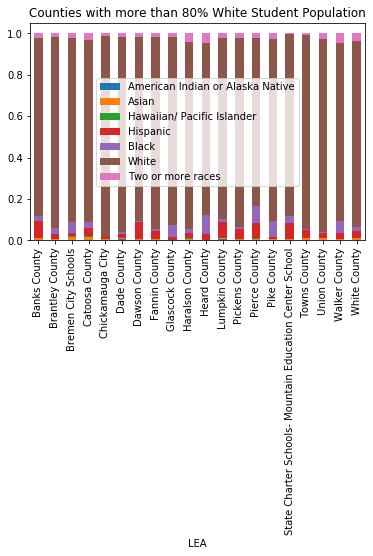

In [6]:
category = "Total enrollment"
ren_df = df[df["Category"]==category]
normalize_df = ren_df[ren].div(ren_df['Total'], axis=0)
normalize_df["LEA"] = ren_df["LEA"]
ren_breakdown = normalize_df.groupby('LEA')[ren].sum().drop("Total",axis=1)
ren_breakdown[ren_breakdown.White > 0.8].plot(kind="bar", stacked=True);
plt.title("Counties with more than 80% White Student Population");

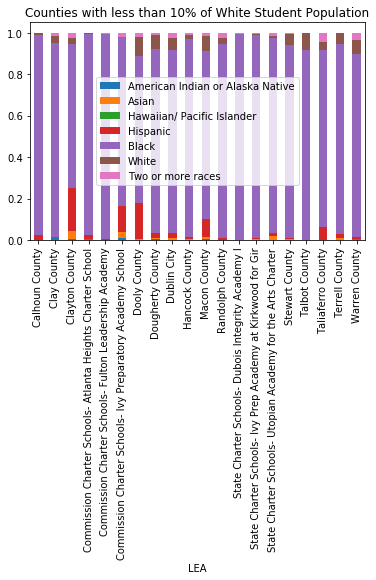

In [7]:
ren_breakdown[ren_breakdown.White < 0.1].plot(kind="bar", stacked=True);
plt.title("Counties with less than 10% of White Student Population");

In [8]:
def common(a,b): 
    c = [value for value in a if value in b] 
    return c

In [9]:
sl = allegation_top_counties.index.tolist()
hrl = ren_breakdown[ren_breakdown.White > 0.5].index.tolist()
lrl = ren_breakdown[ren_breakdown.White < 0.5].index.tolist()

print("Number of Counties with more than 10 Rase Based Allegations: {}".format(len(sl)))
print()
print("Number of Counties with higher than 50% White Student Population: {}".format(len(hrl)))
print("List of shared counties between Counties with Highest Allegations and Counties with higher than 50% White Student Population: {}".format(common(sl,hrl)))
print()
print("Number of Counties with less than 50% White Student Population: {}".format(len(lrl)))
print("List of shared counties between Counties with Highest Allegations and Counties with lower than 50% White Student Population: {}".format(common(sl,lrl)))


Number of Counties with more than 10 Rase Based Allegations: 12

Number of Counties with higher than 50% White Student Population: 110
List of shared counties between Counties with Highest Allegations and Counties with higher than 50% White Student Population: ['Forsyth County Schools', 'Polk School District', 'Cherokee County', 'Fayette County', 'Carroll County', 'State Charter Schools- Cherokee Charter Academy', 'Hall County', 'Paulding County']

Number of Counties with less than 50% White Student Population: 92
List of shared counties between Counties with Highest Allegations and Counties with lower than 50% White Student Population: ['DeKalb County', 'Fulton County', 'Douglas County', 'Muscogee County']


**There seems to be a near even divide between counties with higher than 50% white student population (110) and lower (92). 8 out of the 12 counties with high allegations fall under the counties with higher than 50% white student population. Below, let's do a similar comparison, but instead of using 50% as our divide, let's make it more reflective of Georgia's race ratio.**

Georgia Population (2015)
- Total: 10,181,111
- White Population: 6,269,796

Data gathered from:
<br>https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=bkmk

In [10]:
sl = allegation_top_counties.index.tolist()
hrl = ren_breakdown[ren_breakdown.White > 0.6].index.tolist()
lrl = ren_breakdown[ren_breakdown.White < 0.6].index.tolist()

print("Number of Counties with more than 10 Rase Based Allegations: {}".format(len(sl)))
print()
print("Number of Counties with higher than 60% White Student Population: {}".format(len(hrl)))
print("List of shared counties between Counties with Highest Allegations and Counties with higher than 60% White Student Population: {}".format(common(sl,hrl)))
print()
print("Number of Counties with less than 60% White Student Population: {}".format(len(lrl)))
print("List of shared counties between Counties with Highest Allegations and Counties with lower than 60% White Student Population: {}".format(common(sl,lrl)))


Number of Counties with more than 10 Rase Based Allegations: 12

Number of Counties with higher than 60% White Student Population: 76
List of shared counties between Counties with Highest Allegations and Counties with higher than 60% White Student Population: ['Forsyth County Schools', 'Cherokee County', 'Carroll County', 'State Charter Schools- Cherokee Charter Academy', 'Paulding County']

Number of Counties with less than 60% White Student Population: 127
List of shared counties between Counties with Highest Allegations and Counties with lower than 60% White Student Population: ['DeKalb County', 'Fulton County', 'Polk School District', 'Douglas County', 'Muscogee County', 'Fayette County', 'Hall County']


**Above, there's a larger divide between the number counties with higher and lower white student population. Also, the counties with more allegations are near evenly split between the categories (5 vs 7)**

**Please note that individual counties do not reflect the same race ratio compared to the overall state race ratio.**

**Below, you'll see some quick calculations of averages for the state of Georgia**

In [11]:
category = "Allegations - basis of race color or national origin"
print("Average Allegations on the basis of race color or national origin")
print(df[df["Category"]==category].Allegations.mean())
print()

category = "Disciplined for harassment or bullying on basis of race color or national origin"
print("Average of Disciplined Students for harassment or bullying on basis of race color or national origin")
print(df[df["Category"]==category][ren].mean())
print()

category = "Students reported to have been harassed or bullied on basis of race color or national origin"
print("Average of Students reported to have been harassed or bullied on basis of race color or national origin")
print(df[df["Category"]==category][ren].mean())

Average Allegations on the basis of race color or national origin
1.8719211822660098

Average of Disciplined Students for harassment or bullying on basis of race color or national origin
American Indian or Alaska Native    0.000000
Asian                               0.068966
Hawaiian/ Pacific Islander          0.009852
Hispanic                            0.364532
Black                               0.866995
White                               1.044335
Two or more races                   0.113300
Total                               2.467980
dtype: float64

Average of Students reported to have been harassed or bullied on basis of race color or national origin
American Indian or Alaska Native    0.009852
Asian                               0.167488
Hawaiian/ Pacific Islander          0.000000
Hispanic                            0.364532
Black                               1.300493
White                               0.527094
Two or more races                   0.083744
Total             

## Investigate School Data

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from pathlib import Path
%matplotlib inline

data_columns = ['Lea State', 'LEA', 'School State', 'School', 'ID', 'Year', 'Category',
       'Allegations', 'American Indian or Alaska Native', 'Asian',
       'Hawaiian/ Pacific Islander', 'Hispanic', 'Black', 'White',
       'Two or more races', 'Total', 'SWD (IDEA-Eligible)',
       'SWD (Section 504 only)', 'LEP']

bully_df = pd.DataFrame(columns=data_columns)

data_path = Path("georgia/")
p = data_path.glob('**/*')
files = [x for x in p if x.is_file()]
for file in files:
    try:
        bully_df = pd.concat([bully_df, pd.read_csv(file)],sort=False)
    except:
        pass
    
bully_df.head()

,Lea State,LEA,School State,School,ID,Year,Category,Allegations,American Indian or Alaska Native,Asian,...,Hispanic,Black,White,Two or more races,Total,SWD (IDEA-Eligible),SWD (Section 504 only),LEP,With State Certification,Total Students
0,GA,Cobb County,GA,Kennesaw Charter School,130129002842,2015,Allegations - basis of race color or national ...,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GA,Cobb County,GA,Kennesaw Charter School,130129002842,2015,Allegations - basis of religion,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GA,Cobb County,GA,Kennesaw Charter School,130129002842,2015,Disciplined for harassment or bullying on basi...,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN
3,GA,Cobb County,GA,Kennesaw Charter School,130129002842,2015,Students reported to have been harassed or bul...,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN
4,GA,Cobb County,GA,Kennesaw Charter School,130129002842,2015,Total enrollment,NaN,2.0,55.0,...,88.0,424.0,244.0,46.0,859.0,50,16.0,46.0,NaN,NaN


Number of Counties with No Reported Allegations: 124


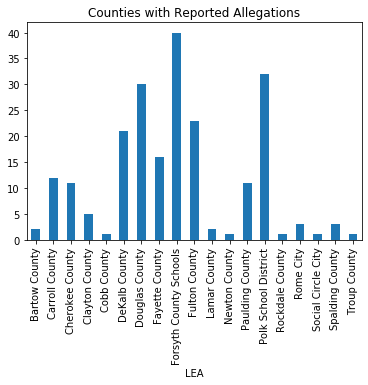

In [13]:
bully_sum = bully_df.groupby('LEA')['Allegations'].sum()
bully_sum[bully_sum > 0].plot(kind="bar");
plt.title("Counties with Reported Allegations");

print("Number of Counties with No Reported Allegations: {}".format(len(bully_sum[bully_sum == 0].index)))


In [14]:
# Race / Ethnicity / Nationality
ren = ['American Indian or Alaska Native','Asian', 'Hawaiian/ Pacific Islander', 'Hispanic', 'Black', 'White', 'Two or more races', 'Total']

In [15]:
# Averages for students who were disciplined for harassment or bullying on basis of race color or national origin

category = "Disciplined for harassment or bullying on basis of race color or national origin"
bully_df[bully_df["Category"]==category][ren].mean()

American Indian or Alaska Native    0.000000
Asian                               0.013774
Hawaiian/ Pacific Islander          0.000000
Hispanic                            0.046832
Black                               0.117080
White                               0.148760
Two or more races                   0.016529
Total                               0.342975
dtype: float64

In [16]:
# Averages for students who reported to have been harassed or bullied on basis of race color or national origin

category = "Students reported to have been harassed or bullied on basis of race color or national origin"
bully_df[bully_df["Category"]==category][ren].mean()

American Indian or Alaska Native    0.002755
Asian                               0.022039
Hawaiian/ Pacific Islander          0.000000
Hispanic                            0.041322
Black                               0.159780
White                               0.078512
Two or more races                   0.012397
Total                               0.316804
dtype: float64

In [17]:
# Average of 0.2 allegations on the basis of race color or national origin

category = "Allegations - basis of race color or national origin"
bully_df[bully_df["Category"]==category].Allegations.mean()

0.2796143250688705

### Dive deeper in Carroll County

Utilizing the school data

In [18]:
carroll_df = bully_df[bully_df["LEA"] == "Carroll County"]

category = "Allegations - basis of race color or national origin"
carroll_school_allegations = carroll_df[carroll_df["Category"]==category].Allegations.sum()
print("Number of allegations on the basis of race color or national origin in Carroll County: {}".format(carroll_school_allegations))
print()

# Averages in Carroll County for students who reported to have been harassed or bullied on basis of race color or national origin
category = "Students reported to have been harassed or bullied on basis of race color or national origin"
carroll_city_reports = carroll_df[carroll_df["Category"]==category][ren].mean()

print("Breakdown of students reported to have been harassed or bullied on basis of race color or national origin for Carroll County")
print(carroll_city_reports)
print()

# Averages for students who were disciplined for harassment or bullying on basis of race color or national origin
category = "Disciplined for harassment or bullying on basis of race color or national origin"
carroll_school_discipline = carroll_df[carroll_df["Category"]==category][ren].mean()

print("Breakdown of students disciplined for harassment or bullying on basis of race color or national origin for Carroll County")
print(carroll_school_discipline)
print()

Number of allegations on the basis of race color or national origin in Carroll County: 12.0

Breakdown of students reported to have been harassed or bullied on basis of race color or national origin for Carroll County
American Indian or Alaska Native    0.000000
Asian                               0.000000
Hawaiian/ Pacific Islander          0.000000
Hispanic                            0.000000
Black                               0.476190
White                               0.619048
Two or more races                   0.095238
Total                               1.190476
dtype: float64

Breakdown of students disciplined for harassment or bullying on basis of race color or national origin for Carroll County
American Indian or Alaska Native    0.000000
Asian                               0.000000
Hawaiian/ Pacific Islander          0.000000
Hispanic                            0.000000
Black                               0.333333
White                               0.761905
Two or more ra

### Compare: Carroll County and Atlanta Public Schools

Utilizing the district data

In [19]:
carroll_district_df = df[df["LEA"] == "Carroll County"]
atlanta_district_df = df[df["LEA"] == "Atlanta Public Schools"]

In [20]:
category = "Allegations - basis of race color or national origin"
carroll_allegations = carroll_district_df[carroll_district_df["Category"] == category].Allegations.sum()
atlanta_allegations = atlanta_district_df[atlanta_district_df["Category"] == category].Allegations.sum()

print("Number of allegations on the basis of race color or national origin in Carroll County: {}".format(carroll_allegations))
print()
print("Number of allegations on the basis of race color or national origin in Atlanta Public Schools: {}".format(atlanta_allegations))
print()

category = "Students reported to have been harassed or bullied on basis of race color or national origin"
carroll_reports = carroll_district_df[carroll_district_df["Category"]==category][ren].mean()
atlanta_reports = atlanta_district_df[atlanta_district_df["Category"]==category][ren].mean()

print("Breakdown of students reported to have been harassed or bullied on basis of race color or national origin for Carroll County")
print(carroll_reports)
print()
print("Breakdown of students reported to have been harassed or bullied on basis of race color or national origin for Atlanta Public Schools")
print(atlanta_reports)
print()


Number of allegations on the basis of race color or national origin in Carroll County: 14.0

Number of allegations on the basis of race color or national origin in Atlanta Public Schools: 2.0

Breakdown of students reported to have been harassed or bullied on basis of race color or national origin for Carroll County
American Indian or Alaska Native     0.0
Asian                                0.0
Hawaiian/ Pacific Islander           0.0
Hispanic                             0.0
Black                               12.0
White                               15.0
Two or more races                    2.0
Total                               29.0
dtype: float64

Breakdown of students reported to have been harassed or bullied on basis of race color or national origin for Atlanta Public Schools
American Indian or Alaska Native    0.0
Asian                               0.0
Hawaiian/ Pacific Islander          0.0
Hispanic                            2.0
Black                               0.0
White

In [21]:
pd.DataFrame(bully_df.groupby(['LEA', 'School']).sum()['Allegations'])

Allegations
LEA              School                                         
Appling County   Altamaha Elementary School                  0.0
                 Appling County Elementary School            0.0
                 Appling County High School                  0.0
                 Appling County Middle School                0.0
                 Appling County Primary School               0.0
...                                                          ...
Wilkes County    Washington-Wilkes Primary School            0.0
Wilkinson County Wilkinson County Elementary School          0.0
                 Wilkinson County High School                0.0
                 Wilkinson County Middle School              0.0
                 Wilkinson County Primary School             0.0

[1878 rows x 1 columns]

## Combine allegations df with teacher count df

In [22]:
data_columns = ['Lea State', 'LEA', 'School State', 'School', 'ID', 'Year', 'Category',
       'Total', 'With State Certification', 'American Indian or Alaska Native',
       'Asian', 'Hawaiian/ Pacific Islander', 'Hispanic', 'Black', 'White',
       'Two or more races', 'Total Students', 'SWD (IDEA-Eligible)', 'LEP']

teacher_school_df = pd.DataFrame(columns=data_columns)

data_path = Path("georgia/teacher/")
p = data_path.glob('**/*')
files = [x for x in p if x.is_file()]
for file in files:
    try:
        teacher_school_df = pd.concat([teacher_school_df, pd.read_csv(file)],sort=False)
    except:
        pass

teacher_school_df.head(6)


,Lea State,LEA,School State,School,ID,Year,Category,Total,With State Certification,American Indian or Alaska Native,Asian,Hawaiian/ Pacific Islander,Hispanic,Black,White,Two or more races,Total Students,SWD (IDEA-Eligible),LEP
0,GA,Effingham County,GA,Springfield Elementary School,130198000891,2015,Classroom Teachers,46.71,46.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GA,Effingham County,GA,Springfield Elementary School,130198000891,2015,Classroom teachers in their first year of teac...,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GA,Effingham County,GA,Springfield Elementary School,130198000891,2015,Classroom teachers in their second year of tea...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GA,Effingham County,GA,Springfield Elementary School,130198000891,2015,Teachers absent more than 10 days of the schoo...,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GA,Effingham County,GA,Springfield Elementary School,130198000891,2015,Teachers employed during current school year,49.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,GA,Effingham County,GA,Springfield Elementary School,130198000891,2015,Teachers employed during both the current and ...,39.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
combined_school_df = pd.concat([teacher_school_df[teacher_school_df["Category"]!="Total enrollment"],bully_df], sort=True)
combined_school_df = combined_school_df.drop(["Year","ID","School State","Lea State"],axis=1)

# There are a different amount of school csv's downloaded between the two folders
# Finding schools in common and reducing dataframe to those

# schools_in_common = common(bully_df.School.unique(),teacher_school_df.School.unique())
# combined_school_df = combined_school_df[combined_school_df["School"].isin(schools_in_common)]

# Above, I only considered unique school names, 
# but there are different schools in different districts with the same names.
# Below, I combined District and School name and looked for unique values
lea_schools_in_common = common((bully_df['LEA'] + " "+ bully_df['School']).tolist() , (teacher_school_df['LEA'] + " "+ teacher_school_df['School']).tolist())
combined_school_df = combined_school_df[(combined_school_df["LEA"]+" "+combined_school_df["School"]).isin(lea_schools_in_common)]
combined_school_df = combined_school_df.sort_values(by=['LEA', 'School']).drop_duplicates().reset_index(drop=True)
combined_school_df.head(5)


,Allegations,American Indian or Alaska Native,Asian,Black,Category,Hawaiian/ Pacific Islander,Hispanic,LEA,LEP,SWD (IDEA-Eligible),SWD (Section 504 only),School,Total,Total Students,Two or more races,White,With State Certification
0,NaN,NaN,NaN,NaN,Classroom Teachers,NaN,NaN,Appling County,NaN,NaN,NaN,Altamaha Elementary School,27.27,NaN,NaN,NaN,27.27
1,NaN,NaN,NaN,NaN,Classroom teachers in their first year of teac...,NaN,NaN,Appling County,NaN,NaN,NaN,Altamaha Elementary School,0.00,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Classroom teachers in their second year of tea...,NaN,NaN,Appling County,NaN,NaN,NaN,Altamaha Elementary School,1.00,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Teachers absent more than 10 days of the schoo...,NaN,NaN,Appling County,NaN,NaN,NaN,Altamaha Elementary School,6.17,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Teachers employed during current school year,NaN,NaN,Appling County,NaN,NaN,NaN,Altamaha Elementary School,29.00,NaN,NaN,NaN,NaN


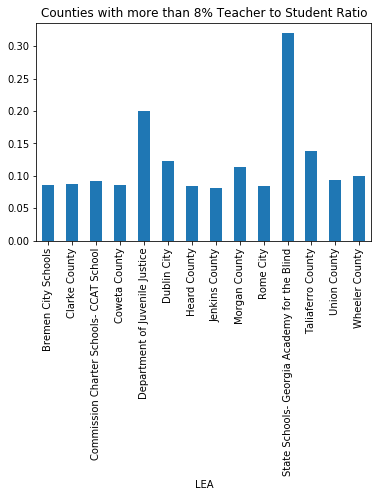

In [24]:
ren_df = combined_school_df[combined_school_df["Category"].isin(["Total enrollment","Classroom Teachers"])].sort_values(by=['LEA', 'School']).drop_duplicates().reset_index(drop=True)


# Problem: Two 'Total enrollment' rows for some schools
# Drop 'Total enrollment' with "Total Students" as NaN
drop_index = ren_df[(ren_df["Category"]=="Total enrollment") & (ren_df["Total Students"].isna())].index
ren_df.drop(labels=drop_index,inplace=True)

total_students_series = ren_df[(ren_df["Category"]=="Total enrollment")]['Total Students'].reset_index(drop=True)
total_teachers_series = ren_df[(ren_df["Category"]=="Classroom Teachers")]['Total'].reset_index(drop=True)

normalize_df = total_teachers_series.div(total_students_series, axis=0)

group_df = pd.DataFrame()
group_df["Teacher:Student"]  = normalize_df
group_df["LEA"] = ren_df[(ren_df["Category"]=="Total enrollment")]["LEA"].reset_index(drop=True)

teacher_student_breakdown = group_df.groupby('LEA')['Teacher:Student'].mean()
teacher_student_breakdown[teacher_student_breakdown > 0.08].plot(kind="bar");
plt.title("Counties with more than 8% Teacher to Student Ratio");

In [75]:
common(sl,teacher_student_breakdown[teacher_student_breakdown > 0.06].index.tolist())

['DeKalb County',
 'Fulton County',
 'Polk School District',
 'Douglas County',
 'Cherokee County',
 'Fayette County',
 'Carroll County',
 'State Charter Schools- Cherokee Charter Academy',
 'Paulding County']

In [77]:
common(sl,teacher_student_breakdown[teacher_student_breakdown < 0.06].index.tolist())

['Forsyth County Schools', 'Hall County']

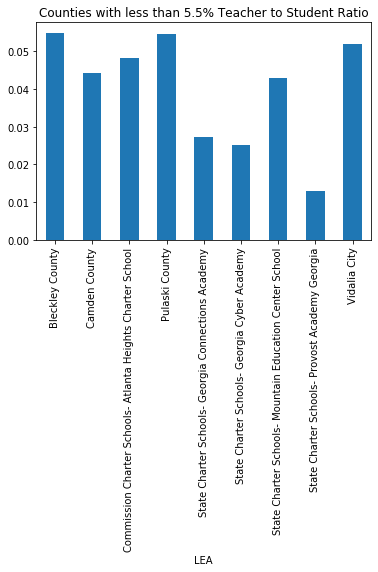

In [25]:
teacher_student_breakdown = group_df.groupby('LEA')['Teacher:Student'].mean()
teacher_student_breakdown[teacher_student_breakdown < 0.055].plot(kind="bar");
plt.title("Counties with less than 5.5% Teacher to Student Ratio");

**For a quick reference, 1 teacher to 20 students is a 5% ratio.**

## Create a Machine Learning acceptable Dataset

TODO:
- You use School.unique(), but there are different schools with the same name
- Clean up the use of temp dataframes

In [45]:
ren = ['American Indian or Alaska Native','Asian', 'Hawaiian/ Pacific Islander', 'Hispanic', 'Black', 'White', 'Two or more races', 'Total']
category1 = 'Allegations - basis of race color or national origin'
category2 = "Total enrollment"
category3 = "Disciplined for harassment or bullying on basis of race color or national origin"
category4 = "Students reported to have been harassed or bullied on basis of race color or national origin"
category5 = "Classroom Teachers"
category6 = "High-School Counselors"
combine = [category2, category3, category4]
temp3 = pd.DataFrame()
for school in combined_school_df.School.unique():
    temp_df = combined_school_df[combined_school_df["School"]==school]
    temp4_df = temp_df[temp_df["Category"]==category5]
    temp5_df = temp_df[temp_df["Category"]==category6]
    temp6_df = temp_df[temp_df["Category"]==category1]
    
    temp_df2 = pd.DataFrame()
    temp_df2["LEA"] = temp4_df["LEA"]
    if not temp6_df.empty:
        temp_df2[category1] = temp6_df["Allegations"].iloc[0]
    else:
        temp_df2[category1] = temp6_df["Allegations"]
    temp_df2[category5] = temp4_df["Total"]
    temp_df2[category6] = temp5_df["Total"]
    for comb in combine:
        for r in ren:
            temp_name = r + " | " + comb
            temp_df = combined_school_df[combined_school_df["School"]==school]
            temp_df = temp_df[temp_df["Category"]==comb]
            if temp_df[r].tolist():
                temp_df2[temp_name] = temp_df[r].iloc[0]
            else:
                temp_df2[temp_name] = 0

    temp3 = pd.concat([temp3,temp_df2])

temp3.head(6)


,LEA,Allegations - basis of race color or national origin,Classroom Teachers,High-School Counselors,American Indian or Alaska Native | Total enrollment,Asian | Total enrollment,Hawaiian/ Pacific Islander | Total enrollment,Hispanic | Total enrollment,Black | Total enrollment,White | Total enrollment,...,Two or more races | Disciplined for harassment or bullying on basis of race color or national origin,Total | Disciplined for harassment or bullying on basis of race color or national origin,American Indian or Alaska Native | Students reported to have been harassed or bullied on basis of race color or national origin,Asian | Students reported to have been harassed or bullied on basis of race color or national origin,Hawaiian/ Pacific Islander | Students reported to have been harassed or bullied on basis of race color or national origin,Hispanic | Students reported to have been harassed or bullied on basis of race color or national origin,Black | Students reported to have been harassed or bullied on basis of race color or national origin,White | Students reported to have been harassed or bullied on basis of race color or national origin,Two or more races | Students reported to have been harassed or bullied on basis of race color or national origin,Total | Students reported to have been harassed or bullied on basis of race color or national origin
0,Appling County,NaN,27.27,NaN,0.0,0.0,2.0,28.0,34.0,334.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Appling County,NaN,40.64,NaN,0.0,7.0,0.0,109.0,163.0,241.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,Appling County,NaN,61.59,NaN,2.0,4.0,0.0,130.0,214.0,613.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,Appling County,NaN,52.17,NaN,2.0,4.0,0.0,94.0,148.0,481.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,Appling County,NaN,55.17,NaN,0.0,4.0,0.0,163.0,202.0,328.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,Atlanta Public Schools,NaN,22.00,NaN,0.0,0.0,0.0,2.0,178.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

def clean_fit_linear_mod(df, response_col, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    
    #Drop the rows with missing response values
    df.dropna(subset=[response_col], axis=0, inplace=True)
    
    y = df[response_col]
    df.drop(response_col, axis=1, inplace=True)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

    #Split into explanatory and response variables
    X = df

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


In [64]:
#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(temp3, "Allegations - basis of race color or national origin", dummy_na=False)

/Users/kevinwebb/Desktop/env/ds/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [65]:
print(test_score, train_score)

-1.510263310566098e+24 0.7734598050324337


**The R2 Test Score is negative meaning my model fits my data badly. There are a few ways to possibly improve it, and this will be investigated when the API is utilized versus the excel sheets.**